In [10]:
import requests
import re
from collections import OrderedDict
import json
import numpy as np

In [11]:
# Current Temperature
w_now = "https://api2.sktelecom.com/weather/current/minutely?ver=1&lat=36.5038&lon=127.4166&appKey=84ccae67-8c6b-4269-8b4d-9131c5eae607"
resp = requests.get(w_now).json()
NOW_Temp = float(resp["weather"]["minutely"][0]["temperature"]["tc"])
NOW_Time = resp["weather"]["minutely"][0]["timeObservation"]

In [12]:
# 10-Days Temperature Forecast
weather10 = "https://api2.sktelecom.com/weather/forecast/6days?ver=1&lat=36.5038&lon=127.4166&appKey=84ccae67-8c6b-4269-8b4d-9131c5eae607"
response = requests.get(weather10).json()
result = response["weather"]["forecast6days"][0]["temperature"]
time0 = response["weather"]["forecast6days"][0]["timeRelease"]

# determinant (Max or Min)
p=-1
# 2D lists
item=[[],[]] #Min&Max Temperature Lists
ind=[[],[]]  #INDEX Lists

# Sort the result values in order
r = OrderedDict(sorted(result.items(), key=lambda t:t[0]))


count=0 #count the number of elements

for i in range(len(r)):
    it = r.popitem()
    pattern = re.compile(r'\d+')
    key = it[0]
    search = pattern.search(key)
    numD = int(search.group(0))
    temp = int(it[1])
    
    # Max of Min determinant i.e "tmin2day" or "tmax2day"  
    p = 0 if key[2] is 'i' else 1

    if len(ind[p]) is 0:
        ind[p].append(numD)
        item[p].append(temp)
    else:
        j=0
        while j<8 and numD > ind[p][j]:
            j+=1
        ind[p].insert(j, numD)
        item[p].insert(j, temp)

print("DAY: ", ind)
print("Max: ", item[1], len(item[1]))
print("Min: ", item[0], len(item[0]))

DAY:  [[2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 3, 4, 5, 6, 7, 8, 9, 10]]
Max:  [8, 8, 10, 11, 9, 10, 11, 10, 12] 9
Min:  [4, 4, -2, 1, 0, 0, 0, 1, 1] 9


In [13]:
# 3-Days Temperature Forecast
weather3 = "https://api2.sktelecom.com/weather/forecast/3days?ver=1&lat=36.5038&lon=127.4166&appKey=84ccae67-8c6b-4269-8b4d-9131c5eae607"
response3 = requests.get(weather3).json()
result3 = response3["weather"]["forecast3days"][0]["fcst3hour"]["temperature"]
res3_hum = response3["weather"]["forecast3days"][0]["fcst3hour"]["humidity"]
res3_pre = response3["weather"]["forecast3days"][0]["fcst3hour"]["precipitation"]
time = response3["weather"]["forecast3days"][0]["timeRelease"]

item3=[] #Temperature List
ind3=[] #INDEX List
count=0 #count the number of elements
itemH=[]
indH=[]
countH=0
itemP=[]
indP=[]

for i in range(len(result3)):
    it = result3.popitem()
    
    # KEY
    key = it[0]
    pattern = re.compile(r'\d+')
    search = pattern.search(key)
    
    # HOUR
    hour = int(search.group(0))
    
    # if the VALUE is not an Empty String
    if it[1] is not '':
        temp = float(it[1])
        # if the INDEX List is empty, just append the hour&temp to the correct list
        if len(ind3) is 0:
            ind3.append(hour)
            item3.append(temp)
            # don't increment count here. 
        # if the INDEX List is not empty, maneuver the sorted list to find the correct position(j)
        else:
            j=0
            # this sorts everything, even if the returned json is unsorted
            while j<len(ind3) and hour > ind3[j]:
                j+=1
            # insert the hour/temp value at the right position
            ind3.insert(j, hour)
            item3.insert(j, temp)
            count+=1 #start incrementing count from here.
            
    # if the Value is an Empty String, just skip
    else:
        continue
        
for i in range(len(res3_hum)):
    it = res3_hum.popitem()
    
    # KEY
    key = it[0]
    pattern = re.compile(r'\d+')
    search = pattern.search(key)
    
    # HOUR
    hour = int(search.group(0))
    
    # if the VALUE is not an Empty String
    if it[1] is not '':
        hum = float(it[1])
        # if the INDEX List is empty, just append the hour&temp to the correct list
        if len(indH) is 0:
            indH.append(hour)
            itemH.append(hum)
            # don't increment count here. 
        # if the INDEX List is not empty, maneuver the sorted list to find the correct position(j)
        else:
            j=0
            # this sorts everything, even if the returned json is unsorted
            while j<len(indH) and hour > indH[j]:
                j+=1
            # insert the hour/temp value at the right position
            indH.insert(j, hour)
            itemH.insert(j, hum)
            countH+=1 #start incrementing count from here.
            
    # if the Value is an Empty String, just skip
    else:
        continue
        
# for i in range(len(res3_hum)):
#     it = res3_hum.popitem()
    
#     # KEY
#     key = it[0]
#     pattern = re.compile(r'\d+')
#     search = pattern.search(key)
    
#     # HOUR
#     hour = int(search.group(0))
    
#     # if the VALUE is not an Empty String
#     if it[1] is not '':
#         hum = float(it[1])
#         # if the INDEX List is empty, just append the hour&temp to the correct list
#         if len(indH) is 0:
#             indH.append(hour)
#             itemH.append(hum)
#             # don't increment count here. 
#         # if the INDEX List is not empty, maneuver the sorted list to find the correct position(j)
#         else:
#             j=0
#             # this sorts everything, even if the returned json is unsorted
#             while j<len(indH) and hour > indH[j]:
#                 j+=1
#             # insert the hour/temp value at the right position
#             indH.insert(j, hour)
#             itemH.insert(j, hum)
#             countH+=1 #start incrementing count from here.
            
#     # if the Value is an Empty String, just skip
#     else:
#         continue

print("Index: ", ind3, len(ind3))
print("Temp: ", item3, len(item3))
print("IndexH: ", indH, len(indH))
print("Hum: ", itemH, len(itemH))

Index:  [4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58] 19
Temp:  [6.0, 1.0, -3.0, -3.0, -4.0, 2.0, 11.0, 15.0, 14.0, 10.0, 7.0, 7.0, 7.0, 10.0, 17.0, 18.0, 15.0, 13.0, 13.0] 19
IndexH:  [4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58] 19
Hum:  [30.0, 40.0, 60.0, 65.0, 75.0, 55.0, 45.0, 50.0, 55.0, 70.0, 75.0, 80.0, 85.0, 85.0, 65.0, 60.0, 70.0, 80.0, 90.0] 19


In [14]:
# For keeping track of the dates and week-days/ends
import datetime as dt
recordedTime = int(time[11:13])
mark=[6, 18, 6+24, 18+24, 6+48, 18+48]
start=0
for i in range(6):
    mark[i]-=recordedTime
    if mark[i] < 0:
        start+=1

if start is 1:
    mark = mark[1:]
    mark.insert(0, 0)
elif start is 2:
    mark = mark[2:]

In [15]:
# Humidity
hourly = "https://api2.sktelecom.com/weather/current/hourly?ver=1&lat=36.5038&lon=127.4166&appKey=84ccae67-8c6b-4269-8b4d-9131c5eae607"
res_hourly = requests.get(hourly).json()
res_hum = res_hourly["weather"]["hourly"][0]["humidity"]
NOW_Hum = float(res_hum)

In [16]:
# Draw Graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

# First Graph
plt.subplot(211)
plt.title('Cheongju 3 Day Forecast: <{0}>'.format(time), fontweight='bold', fontsize='x-large')
lowest = min(item3)
plt.plot(ind3, item3, "#617bfb", label='3 Day Minimum: ({0}\u2103)'.format(lowest), linewidth=3)
plt.legend(shadow=True)
plt.xlabel("# of Hours Passed", fontsize='large', fontweight='bold')
plt.ylabel("Temperature(\u2103)", fontsize='large', fontweight='bold', color='#617bfb')
plt.xlim(-6, ind3[count]) # x-axis min/max limits
plt.xticks(np.arange(0, ind3[count]+6, 6), fontsize='large')
plt.yticks(fontsize='large', color='#617bfb')
plt.grid(linestyle='--')

# Annotate "NOW"
plt.plot(0, NOW_Temp, 'o', color='#617bfb')
plt.text(-3, NOW_Temp, "NOW\n{0}".format(NOW_Time[11:16]), color='#ff4253', fontweight='bold', va='center', ha='center')

# Mark area 6:00 - 18:00 for every date presented on the graph.
today = dt.date.today()
markingdays = int(len(mark))
addedDays=1 if markingdays is 4 else 0 # if the recorded time is 20:00 or beyond, must add 1 more day

for i in range(0, markingdays, 2):
    deltaT = dt.timedelta(addedDays+i/2)
    Day = today+deltaT
    WeekNo = Day.weekday() # weekday() -> returns day number 0~6, 0 being Monday and 6 being Sunday
    dayColor='#ff4253' if WeekNo >= 5 else 'teal' # if weekday->green, if weekend->scarlet
  
    plt.axvspan(mark[i], mark[i+1], facecolor=dayColor, alpha=0.2) #
    DATE = str(Day)[5:]
    # x-pos, y-pos, Date in string, other parameters...
    plt.text((mark[i]+mark[i+1])/2, min(lowest, NOW_Temp), DATE, horizontalalignment='center', fontweight='bold', color=dayColor)
    

# Right-Y axis (Humidity)
humX = plt.twinx()
humX.plot(indH, itemH, 'o', label='Humidity', color='teal')
humX.plot(0, NOW_Hum, 'o', color='teal')
humX.set_ylabel("Humidity(%)", fontsize='large', fontweight='bold', color='teal')
humX.tick_params(axis='y', colors='teal', direction='out', length=13, width=3)
humX.set_ylim(0, 100)


# Second Graph
plt.subplot(212)
plt.title('Cheongju 10 Day Forecast: <{0}>'.format(time0), fontweight='bold', fontsize='x-large')
maximum = max(item[1])
minimum = min(item[0])

tenDay=[]
today=dt.date.today()
deltaT = 3
for i in range(8):
    tenDay.append(str(today+dt.timedelta(deltaT+i))[5:])


plt.plot(tenDay, item[1][1:], '#f86586', label='Temp Max({0}\u2103)'.format(maximum), linewidth=3)
plt.plot(tenDay, item[0][1:], "#617bfb", label='Temp Min({0}\u2103)'.format(minimum), linewidth=3)
plt.legend(shadow=True)
plt.xlabel("Date", fontsize='large', fontweight='bold')
plt.ylabel("Temperature(\u2103)", fontsize='large', fontweight='bold')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.suptitle('Powered by SK Telecom Weather API', color='#fc5f10')

#padding
plt.tight_layout(pad=4, w_pad=1, h_pad=2)

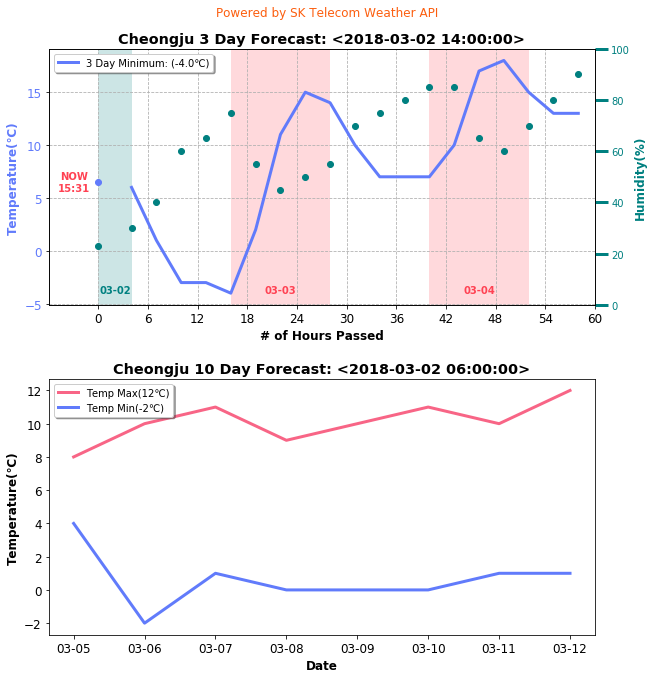

In [17]:
plt.savefig('Forecast_{0}_{1}.png'.format(time[0:10], time[11:13]), dpi=100)
plt.show()